In [1]:
my_path = r"C:\Users\Eddie\OneDrive - Deakin University\Online Storage\Kaggle Dataset - Steam Games of All Time\Steam\bestSelling_games.csv"

In [2]:
# import libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# import visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
# Machine Learning imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# Open the file from the path
df = pd.read_csv(my_path)

In [5]:
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_name            2380 non-null   object 
 1   reviews_like_rate    2380 non-null   int64  
 2   all_reviews_number   2380 non-null   int64  
 3   release_date         2380 non-null   object 
 4   developer            2380 non-null   object 
 5   user_defined_tags    2380 non-null   object 
 6   supported_os         2380 non-null   object 
 7   supported_languages  2380 non-null   object 
 8   price                2380 non-null   float64
 9   other_features       2380 non-null   object 
 10  age_restriction      2380 non-null   int64  
 11  rating               2380 non-null   float64
 12  difficulty           2380 non-null   int64  
 13  length               2380 non-null   int64  
 14  estimated_downloads  2380 non-null   int64  
dtypes: float64(2), int64(6), object(7)
mem

In [7]:
df.columns
# 2380 rows and 15 columns

Index(['game_name', 'reviews_like_rate', 'all_reviews_number', 'release_date',
       'developer', 'user_defined_tags', 'supported_os', 'supported_languages',
       'price', 'other_features', 'age_restriction', 'rating', 'difficulty',
       'length', 'estimated_downloads'],
      dtype='object')

# Data Cleaning and Preprocessing

In [8]:
# check for duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace = True)

# check for missing values
missing_values = df.isnull().sum()
print(f"Missing values each column: {missing_values}")

Missing values each column: game_name              0
reviews_like_rate      0
all_reviews_number     0
release_date           0
developer              0
user_defined_tags      0
supported_os           0
supported_languages    0
price                  0
other_features         0
age_restriction        0
rating                 0
difficulty             0
length                 0
estimated_downloads    0
dtype: int64


In [9]:
# But at first we should suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
# Convert release_date to datetime, create a new column 
df["release_date_updated"] = df["release_date"].apply(lambda x: pd.to_datetime(x))

In [11]:
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads,release_date_updated
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000,2012-08-21
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000,2017-12-21
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000,2025-05-30
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000,2023-03-28
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000,2019-12-05


In [12]:
# Ensure all the numeric columns are of the correct type
X_features = ["reviews_like_rate",	"all_reviews_number", "age_restriction",
              "rating",	"difficulty", "length",	"estimated_downloads"]
for column in X_features:
    df[column] = pd.to_numeric(df[column])

# EDA

In [13]:
# Using a variety of visualization techniques, we explore relationships in this dataset

In [14]:
# Create a new dataframe for correlation analysis
corr_df = df.select_dtypes(include=[np.number])

In [15]:
corr_df.head()
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   reviews_like_rate    2380 non-null   int64  
 1   all_reviews_number   2380 non-null   int64  
 2   price                2380 non-null   float64
 3   age_restriction      2380 non-null   int64  
 4   rating               2380 non-null   float64
 5   difficulty           2380 non-null   int64  
 6   length               2380 non-null   int64  
 7   estimated_downloads  2380 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 148.9 KB


In [16]:
corr_df.describe()

,reviews_like_rate,all_reviews_number,price,age_restriction,rating,difficulty,length,estimated_downloads
count,2380.000000,2.380000e+03,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2.380000e+03
mean,82.413445,3.161508e+04,10.509130,10.605462,3.228017,2.864706,22.965126,2.523007e+06
std,12.643745,2.137197e+05,11.344576,6.395752,0.771203,0.975194,21.247556,1.118283e+07
min,20.000000,1.000000e+01,0.000000,0.000000,0.390000,1.000000,1.000000,9.000000e+01
25%,76.000000,3.420000e+02,2.990000,10.000000,2.750000,2.000000,6.000000,3.500000e+04
50%,85.000000,2.106500e+03,7.990000,13.000000,3.380000,3.000000,16.000000,2.171500e+05
75%,92.000000,1.303000e+04,12.490000,17.000000,3.810000,3.000000,34.000000,1.380000e+06
max,100.000000,8.803754e+06,79.990000,17.000000,4.830000,5.000000,80.000000,3.061700e+08


In [17]:
# now lets make a heatmap with these X_features
corr = corr_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(data = corr, annot = True, cmap = "coolwarm")
plt.title ("Correlation heatmap for features")

Text(0.5, 1.0, 'Correlation heatmap for features')

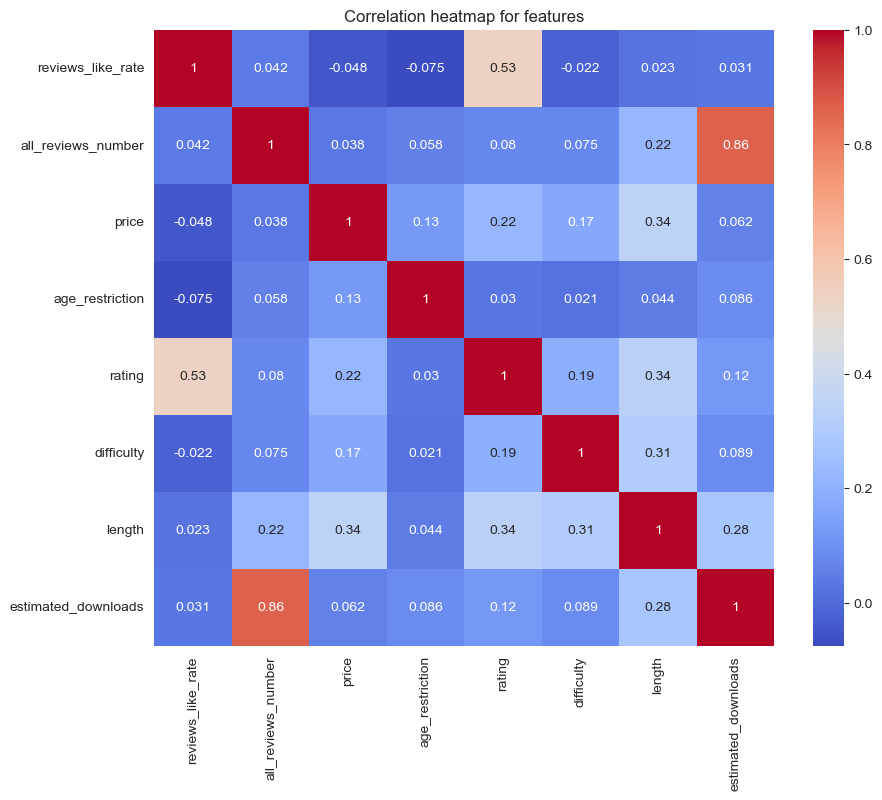

In [18]:
plt.show()

In [19]:
# we have a very positive relationship between all_review_number and estimated downloads

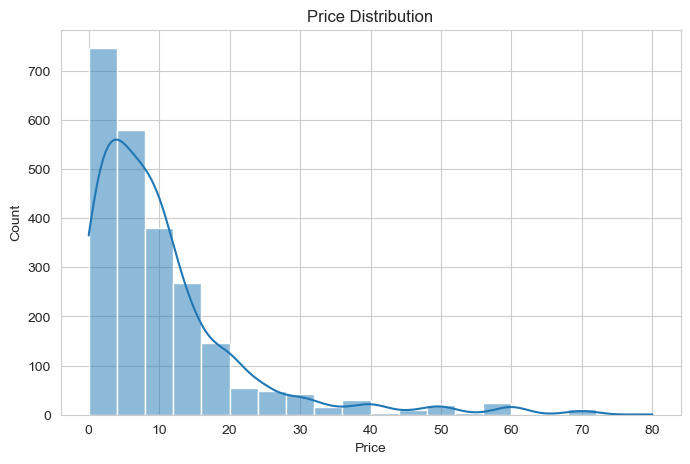

In [20]:
# Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'].dropna(), bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()


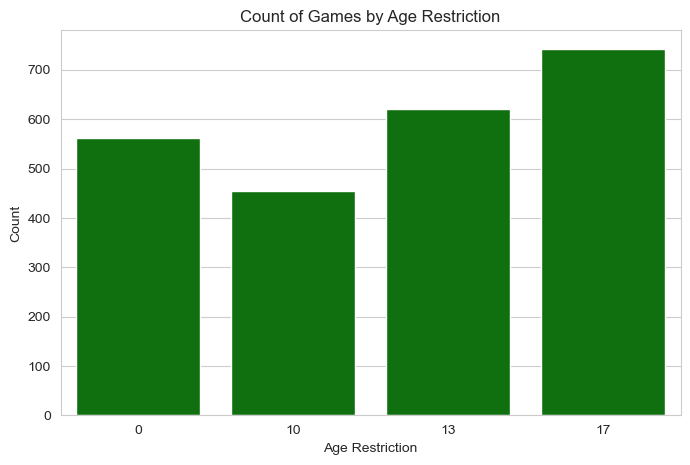

In [21]:
# Count plot for age_restriction (as a proxy for categorical grouping)
plt.figure(figsize=(8, 5))
sns.countplot(x='age_restriction', data=df, color = "green")
plt.title('Count of Games by Age Restriction')
plt.xlabel('Age Restriction')
plt.ylabel('Count')
plt.show()


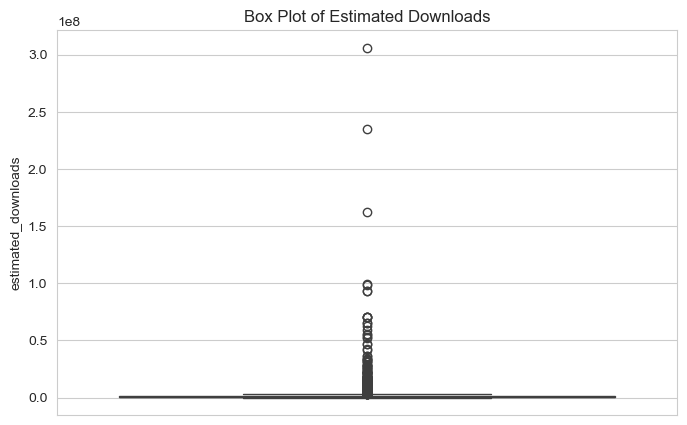

In [22]:
# Box plot for estimated downloads
plt.figure(figsize=(8, 5))
sns.boxplot(y='estimated_downloads', data=df)
plt.title('Box Plot of Estimated Downloads')
plt.show()

In [23]:
df["year_introduced"] = df["release_date_updated"].dt.year

In [24]:
df["year_introduced"].value_counts().head(10)

year_introduced
2024    469
2025    323
2023    293
2022    186
2021    170
2020    155
2019    129
2018    128
2016    111
2017    110
Name: count, dtype: int64

In [25]:
# we are plotting top 10 years that has highest number of games being introduced.
df["year_introduced"].value_counts().head(10).plot(kind= "bar")

<Axes: xlabel='year_introduced'>

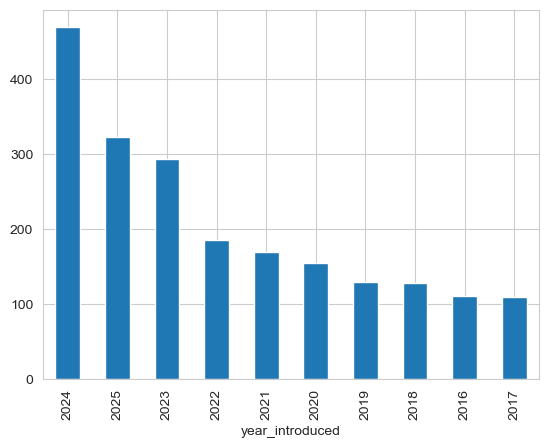

In [26]:
plt.show()

In [27]:
# i want to check the user_defined_tags
df["user_defined_tags"].value_counts()

user_defined_tags
Simulation, Management               29
FPS, Action                          27
Action, FPS                          25
Simulation                           23
Cute, Puzzle                         22
                                     ..
Strategy, RPG, Adventure              1
Action, RPG, Adventure, Combat        1
Action, RPG, Simulation               1
Platformer, 2D, Action, Adventure     1
Action, Simulation, RPG, Driving      1
Name: count, Length: 1649, dtype: int64

In [28]:
# Also i want to check which developer (in top 10) has released the most games
df["developer"].value_counts().head(10)

developer
Valve                         17
Arc System Works              16
CAPCOM Co., Ltd.              12
CREATIVE ASSEMBLY             11
Paradox Development Studio    10
Ubisoft Montreal              10
Square Enix                   10
id Software                    9
Bethesda Game Studios          8
Wales Interactive              8
Name: count, dtype: int64

In [29]:
# Out of curiosity, i want to know games that Valve has introduced, which had more than 90 rating 
Valve_df = df[(df["developer"] == "Valve") & (df["reviews_like_rate"] > 90)]

In [30]:
Valve_df

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads,release_date_updated,year_introduced
26,Left 4 Dead 2,97,732065,"17 Nov, 2009",Valve,"FPS, Action, Survival, Horror","win, linux","English, Danish, Dutch, Finnish, French, Germa...",5.79,"Single-player, Online PvP, Online Co-op, Steam...",17,4.01,3,40,65370000,2009-11-17,2009
69,Left 4 Dead,96,51946,"17 Nov, 2008",Valve,"FPS, Action, Survival, Horror",win,"English, French, German, Spanish - Spain, Russ...",5.79,"Single-player, Steam Achievements, Captions av...",17,4.04,3,31,65370000,2008-11-17,2008
371,Counter-Strike,96,160050,"1 Nov, 2000",Valve,"Action, FPS","win, mac, linux","English, French, German, Italian, Spanish - Sp...",5.79,"Online PvP, Shared/Split Screen PvP, Family Sh...",17,3.89,3,65,21450000,2000-11-01,2000
517,Portal 2,98,359524,"19 Apr, 2011",Valve,"Platformer, Puzzle, Story Rich","win, linux","English, French, German, Spanish - Spain, Czec...",5.79,"Single-player, Online Co-op, Shared/Split Scre...",10,4.41,3,17,36010000,2011-04-19,2011
544,Counter-Strike: Source,96,126155,"1 Nov, 2004",Valve,"FPS, Action","win, linux","English, French, German, Italian, Japanese, Ko...",5.79,"Cross-Platform Multiplayer, Steam Achievements...",17,3.87,3,63,26660000,2004-11-01,2004
642,Half-Life,96,104842,"19 Nov, 1998",Valve,"FPS, Story Rich","win, mac, linux","English, French, German, Italian, Spanish - Sp...",5.79,"Single-player, Online PvP, Steam Cloud, Remote...",17,4.21,3,22,18140000,1998-11-19,1998
766,Portal,98,153046,"10 Oct, 2007",Valve,"Puzzle, Platformer","win, mac","English, French, German, Russian, Danish, Dutc...",5.79,"Single-player, Steam Achievements, Captions av...",13,4.31,3,9,28100000,2007-10-10,2007
839,Half-Life 2,97,180435,"16 Nov, 2004",Valve,"FPS, Action, Story Rich","win, mac","English, French, German, Italian, Korean, Span...",5.79,"Single-player, Steam Achievements, Steam Tradi...",17,4.36,3,22,25360000,2004-11-16,2004
848,Half-Life: Alyx,98,85255,"23 Mar, 2020",Valve,"FPS, Story Rich, Horror, Action",win,"English, French, German, Spanish - Spain, Japa...",26.99,"Single-player, Steam Achievements, Tracked Con...",17,4.32,3,19,4590000,2020-03-23,2020


In [31]:
# now lets plot some graph
sns.lmplot(data = Valve_df, x = "length", y = "reviews_like_rate")

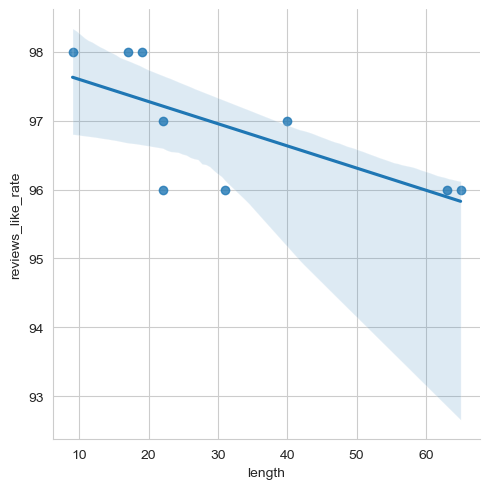

In [32]:
plt.show()

# Now it is time for our analysis prediction

In [33]:
# Define features and target variable

In [34]:
X_features = ["reviews_like_rate", "all_reviews_number", "age_restriction",
              "rating",	"difficulty", "length"]

In [35]:
Y_target = "estimated_downloads"

In [36]:
X = df[X_features]

In [37]:
Y = df[Y_target]

In [38]:
# Split the data into training set and testing set

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)

In [40]:
# Create a model with RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 8)

In [41]:
# fit the data into our model
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=8)

In [42]:
# Predict on the test set and evaluate using metrics
y_predict = model.predict(X_test)

In [43]:
metrics.r2_score(Y_test, y_predict)

0.7079051122204036

In [44]:
# our model prediction is at 70% which i could consider it is pretty good at predicting our games. 
# However, I wonder if our model's prediction could be improved if we add category columns "user_defined_tags" and "developer"